# データの読み込み

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import japanize_matplotlib

In [4]:
import seaborn as sns
sns.set

<function seaborn.rcmod.set(*args, **kwargs)>

In [5]:
import datetime

In [6]:
pd.read_excel('data_explanation.xlsx', sheet_name=0)

,ファイル名,内容
0,train.csv,訓練用データ
1,test.csv,評価用データ
2,weather.csv,天候データ
3,sample_submission.csv,投稿データフォーマット


In [7]:
pd.read_excel('data_explanation.xlsx', sheet_name=1)

,ファイル名,カラム名,内容
0,train.csv,kind,野菜の種類
1,NaN,date,日付
2,NaN,amount,卸売数量合計（合計の意味は、複数産地のものがあればその合計をとっているの意味）
3,NaN,mode_price,卸売価格中央値（中央値の意味は、複数産地のものがあればその中央値をとっているの意味）
4,NaN,area,"産地。複数産地のものが売られていた場合は""_""で結合"
5,test.csv,kind,野菜の種類
6,NaN,date,日付
7,NaN,area,"産地。複数産地のものが売られていた場合は""_""で結合"
8,weather.csv,date,日付
9,NaN,mean_temp,平均気温（℃）


In [8]:
import openpyxl
data_exp = openpyxl.load_workbook('data_explanation.xlsx')
print(data_exp.sheetnames)

['データ説明', '\u3000カラム説明']


In [9]:
data_exp[data_exp.sheetnames[0]]

<Worksheet "データ説明">

In [10]:
train_raw = pd.read_csv('train.csv')
train_raw

,kind,date,amount,mode_price,area
0,だいこん,20051107,201445,735.0,千葉
1,だいこん,20051108,189660,840.0,千葉_各地_青森
2,だいこん,20051110,218166,735.0,千葉_各地_青森
3,だいこん,20051111,182624,682.5,千葉_青森
4,だいこん,20051112,220691,682.5,千葉_青森
...,...,...,...,...,...
97777,しめじ,20170526,17231,48.5,新潟_長野
97778,しめじ,20170527,17105,48.5,新潟_長野
97779,しめじ,20170529,12406,48.5,新潟_長野
97780,しめじ,20170530,12320,48.5,新潟_長野


In [11]:
test_raw = pd.read_csv('test.csv')
test_raw

,kind,date,area
0,だいこん,20220502,千葉_各地_青森
1,だいこん,20220506,千葉_各地_青森
2,だいこん,20220507,千葉_各地_青森
3,だいこん,20220509,千葉_各地_青森
4,だいこん,20220510,千葉_各地_青森
...,...,...,...
315,ミニトマト,20220526,各地_愛知
316,ミニトマト,20220527,各地_愛知
317,ミニトマト,20220528,各地_愛知
318,ミニトマト,20220530,各地_愛知


In [12]:
weather_raw = pd.read_csv('weather.csv')
weather_raw

,date,mean_temp,max_temp,max_temp_time,min_temp,min_temp_time,sum_rain,sun_time,mean_humid,area
0,20041106,13.1,20.1,2004/11/6 12:50,8.1,2004/11/6 05:31,5.0,1.6,77.0,青森
1,20041107,9.6,12.5,2004/11/7 13:40,5.4,2004/11/7 22:17,0.0,4.1,63.0,青森
2,20041108,9.0,15.5,2004/11/8 12:51,3.2,2004/11/8 06:28,0.0,8.9,72.0,青森
3,20041109,12.2,17.7,2004/11/9 14:40,5.7,2004/11/9 02:49,1.5,1.2,85.0,青森
4,20041110,11.6,16.4,2004/11/10 14:42,6.9,2004/11/10 06:23,0.0,7.5,89.0,青森
...,...,...,...,...,...,...,...,...,...,...
204315,20220426,21.3,23.6,2022/4/26 14:27,17.9,2022/4/26 04:17,2.5,0.0,89.0,東京
204316,20220427,23.0,27.7,2022/4/27 13:12,18.9,2022/4/28 0:00,0.5,1.6,79.0,東京
204317,20220428,16.9,21.1,2022/4/28 15:03,14.2,2022/4/28 22:40,0.0,5.5,57.0,東京
204318,20220429,12.9,16.4,2022/4/29 09:21,9.0,2022/4/29 23:55,40.0,0.2,86.0,東京


In [13]:
sub_raw = pd.read_csv('sample_submission.csv')
sub_raw

,kind,date,mode_price
0,だいこん,20220502,0
1,だいこん,20220506,0
2,だいこん,20220507,0
3,だいこん,20220509,0
4,だいこん,20220510,0
...,...,...,...
315,ミニトマト,20220526,0
316,ミニトマト,20220527,0
317,ミニトマト,20220528,0
318,ミニトマト,20220530,0


In [14]:
train_raw.isnull().sum()

kind          0
date          0
amount        0
mode_price    0
area          0
dtype: int64

In [15]:
train_raw.describe(include='all')

,kind,date,amount,mode_price,area
count,97782,9.778200e+04,97782.000000,97782.000000,97782
unique,44,NaN,NaN,NaN,266
top,トマト,NaN,NaN,NaN,北海道
freq,4379,NaN,NaN,NaN,5410
mean,NaN,2.013619e+07,87095.257246,1341.207081,NaN
std,NaN,4.726274e+04,84438.195701,1304.031597,NaN
min,NaN,2.005111e+07,1.000000,18.500000,NaN
25%,NaN,2.009123e+07,21664.250000,227.000000,NaN
50%,NaN,2.014012e+07,58335.500000,1242.000000,NaN
75%,NaN,2.018020e+07,128100.750000,1890.000000,NaN


In [16]:
train_raw['kind'].unique()

array(['だいこん', 'かぶ', 'にんじん', 'ごぼう', 'れんこん', 'キャベツ', 'レタス', 'はくさい', 'こまつな',
       'ほうれんそう', 'ねぎ', 'しゅんぎく', 'ブロッコリー', 'きゅうり', 'かぼちゃ', 'なす', 'トマト',
       'ピーマン', 'じゃがいも', 'さつまいも', 'さといも', 'たまねぎ', 'なましいたけ', 'セルリー',
       'さやえんどう', 'なのはな', 'たけのこ', 'ふき', 'うど', 'そらまめ', 'アスパラガス', 'ピース',
       'とうもろこし', 'いんげん', 'えだまめ', 'うめ', 'まつたけ', 'オクラ', 'レイシにがうり', 'みずな',
       'ミニトマト', 'にら', 'えのきだけ', 'しめじ'], dtype=object)

In [17]:
len(train_raw['kind'].unique())

44

In [18]:
test_raw['kind'].unique()

array(['だいこん', 'にんじん', 'キャベツ', 'レタス', 'はくさい', 'こまつな', 'ほうれんそう', 'ねぎ',
       'きゅうり', 'トマト', 'ピーマン', 'じゃがいも', 'なましいたけ', 'セルリー', 'そらまめ', 'ミニトマト'],
      dtype=object)

In [19]:
len(test_raw['kind'].unique())

16

In [20]:
len(sub_raw['kind'].unique())

16

## trainデータ

In [21]:
train = train_raw.copy()

### dateをdatetime型に変換

In [22]:
train['date'] = train['date'].astype(str)

In [23]:
train['date'] = pd.to_datetime(train['date'])

# LSTM_study

## だいこん単体の予測

In [24]:
df_daikon = train[train['kind']=='だいこん'][['date', 'mode_price']].set_index('date')
df_daikon

,mode_price
date,
2005-11-07,735.0
2005-11-08,840.0
2005-11-10,735.0
2005-11-11,682.5
2005-11-12,682.5
...,...
2022-04-25,864.0
2022-04-26,756.0
2022-04-28,864.0


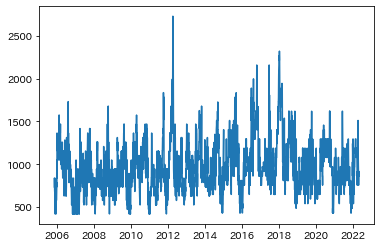

In [25]:
plt.plot(df_daikon.index, df_daikon['mode_price'])

In [26]:
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    first_date = str_to_datetime(first_date_str)
    last_date = str_to_datetime(last_date_str)
    
    target_date = first_date
    
    dates = []
    X, Y = [], []
    
    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n+1)
        
        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return
        
        values = df_subset['mode_price'].to_numpy()
        x, y = values[:-1], values[-1]
        
        dates.append(target_date)
        X.append(x)
        Y.append(y)
        
        next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year_month_day = next_date_str.split('-')
        year, month, day = year_month_day
        next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
        
        if last_time:
            break
        
        target_date = next_date
        
        if target_date == last_date:
            last_time = True
            
    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates

    X = np.array(X)
    for i in range(0, n):
        X[:,i]
        ret_df[f'Target-{n-i}'] = X[:, i]

    ret_df['Target'] = Y

    return ret_df

In [27]:
# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df_daikon,
                               '2021-04-30',
                               '2022-04-30',
                               n=3)

In [28]:
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-04-30,864.0,864.0,864.0,972.0
1,2021-05-01,864.0,864.0,972.0,972.0
2,2021-05-03,864.0,972.0,972.0,972.0
3,2021-05-06,972.0,972.0,972.0,972.0
4,2021-05-07,972.0,972.0,972.0,972.0
...,...,...,...,...,...
250,2022-04-25,1026.0,972.0,918.0,864.0
251,2022-04-26,972.0,918.0,864.0,756.0
252,2022-04-28,918.0,864.0,756.0,864.0
253,2022-04-29,864.0,756.0,864.0,918.0


In [29]:
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()
    
    dates = df_as_np[:, 0]
    
    middle_matrix = df_as_np[:, 1: -1]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
    
    Y = df_as_np[:, -1]
    
    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)
dates.shape, X.shape, y.shape

((255,), (255, 3, 1), (255,))

In [30]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

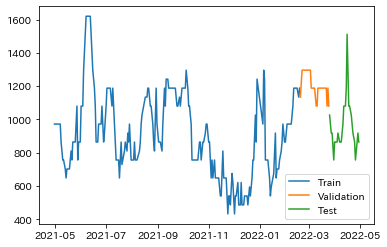

In [31]:
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train','Validation','Test'])

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                   layers.LSTM(64),
                   layers.Dense(32, activation='relu'),
                   layers.Dense(32, activation='relu'),
                   layers.Dense(1)])

model.compile(loss='mse',
             optimizer=Adam(learning_rate=0.001),
             metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Metal device set to: Apple M1


2022-06-19 19:22:58.045992: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-19 19:22:58.046108: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/100


2022-06-19 19:22:58.642952: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-19 19:22:59.345831: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-19 19:22:59.468981: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-19 19:23:00.778145: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 4s 177ms/step - loss: 877901.7500 - mean_absolute_error: 903.3956 - val_loss: 1451563.1250 - val_mean_absolute_error: 1202.5292
Epoch 2/100
1/7 [===>..........................] - ETA: 0s - loss: 729985.7500 - mean_absolute_error: 826.2869

2022-06-19 19:23:02.457692: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-19 19:23:02.505590: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 11ms/step - loss: 877134.3125 - mean_absolute_error: 902.9698 - val_loss: 1450621.1250 - val_mean_absolute_error: 1202.1373
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 876257.6250 - mean_absolute_error: 902.4822 - val_loss: 1449199.1250 - val_mean_absolute_error: 1201.5459
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 875175.1875 - mean_absolute_error: 901.8793 - val_loss: 1447456.6250 - val_mean_absolute_error: 1200.8204
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 873730.4375 - mean_absolute_error: 901.0814 - val_loss: 1445307.6250 - val_mean_absolute_error: 1199.9253
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 871806.6250 - mean_absolute_error: 900.0159 - val_loss: 1441970.8750 - val_mean_absolute_error: 1198.5343
Epoch 7/100
7/7 [==============================] - 0s 10ms/step - loss: 869155.5625 - mean_absolute_error: 898.5248 - val_l

2022-06-19 19:23:09.474460: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-19 19:23:09.510355: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


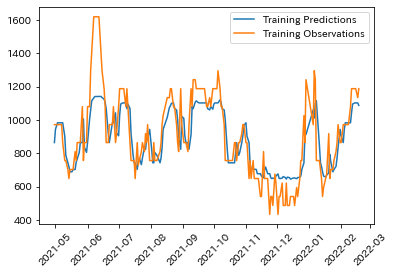

In [33]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.xticks(rotation=45)
plt.legend(['Training Predictions', 'Training Observations'])

In [34]:
pd.DataFrame({'Date':dates[:q_80], 'Target(Close)':y_train,'Prediction':train_predictions})

,Date,Target(Close),Prediction
0,2021-04-30,972.0,863.992615
1,2021-05-01,972.0,943.289612
2,2021-05-03,972.0,982.946777
3,2021-05-06,972.0,983.135132
4,2021-05-07,972.0,983.135132
...,...,...,...
199,2022-02-12,1188.0,1095.523682
200,2022-02-14,1188.0,1102.373291
201,2022-02-15,1188.0,1102.402222
202,2022-02-17,1134.0,1102.402222


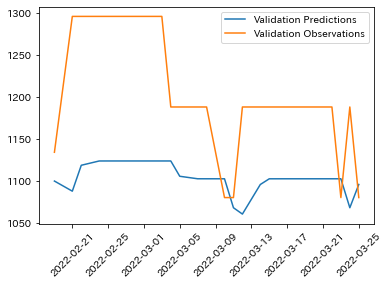

In [35]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.xticks(rotation=45)
plt.legend(['Validation Predictions', 'Validation Observations'])

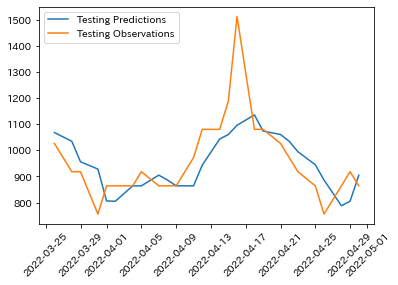

In [36]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.xticks(rotation=45)
plt.legend(['Testing Predictions','Testing Observations'])

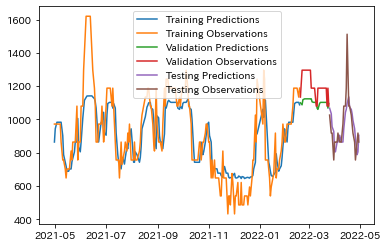

In [37]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
           'Training Observations',
           'Validation Predictions',
           'Validation Observations',
           'Testing Predictions',
           'Testing Observations'])

In [38]:
from copy import deepcopy

In [39]:
recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
    last_window = deepcopy(X_train[-1])
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window[-1] = next_prediction

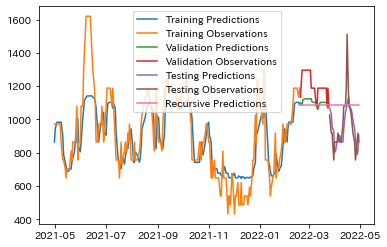

In [40]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
           'Training Observations',
           'Validation Predictions',
           'Validation Observations',
           'Testing Predictions',
           'Testing Observations',
           'Recursive Predictions'])